In [89]:
# load score as df
path_knn = 'result/knn_result.csv'
path_lasso = 'result/lasso_result.csv'
path_grad_boost = 'result/grad_boost_result.csv'
path_gpr = 'result/gpr_result.csv'

import pandas as pd
df_knn = pd.read_csv(path_knn)
df_lasso = pd.read_csv(path_lasso)
df_grad_boost = pd.read_csv(path_grad_boost)
df_gpr = pd.read_csv(path_gpr)

print("knn: ",df_knn.shape)
print("lasso: ",df_lasso.shape)
print("grad_boost: ",df_grad_boost.shape)
print("gpr: ",df_gpr.shape)



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import stats

#plt.style.use('ggplot')
# set the color of the bars
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)

# set plot size
plt.rcParams['figure.figsize'] = [12,8]
# set font size
plt.rcParams.update({'font.size': 15})

def plot(metric, distribution='kde', density=False):

    def show_his(df, name,whole_genes_baseline=False):
        
        # Determine the min and max values across all methods
        global_min = min(df_knn[metric].min(), df_lasso[metric].min(), df_grad_boost[metric].min(), df_gpr[metric].min())
        global_max = max(df_knn[metric].max(), df_lasso[metric].max(), df_grad_boost[metric].max(), df_gpr[metric].max())
        
        # Create an array of bin edges with 10 bins
        bin_edges = np.linspace(global_min, global_max, 24)  # This will create 10 bins
        
        counts, edges, bars = plt.hist(df[metric], bins=bin_edges, alpha=0.5, label=name, density=density)

        # plot the kde
        if distribution == 'kde':
            kde = stats.gaussian_kde(df[metric])
            kde_x = np.linspace(global_min, global_max, 1000)
            kde_y = kde(kde_x)
            if density == False:
                # scale the kde to the counts
                kde_y = kde_y / max(kde_y) * max(counts)
            # plot use the same color as the histogram
            plt.plot(kde_x, kde_y, color=bars[0].get_facecolor())

        if whole_genes_baseline:
            # plot a the line for the row whose module is "all"
            plt.axvline(x=df[df['module'] == 'all'][metric].values[0], color='black', linestyle='--', label='all genes')
    
    #show_his(df_knn, 'knn')
    show_his(df_lasso, 'lasso')
    show_his(df_grad_boost, 'grad_boost')
    show_his(df_gpr, 'gpr',whole_genes_baseline=True)

    # show the axis
    plt.axis('on')
    plt.xlabel('mean percentage error')
    if density:
        plt.ylabel('density')
    else:
        plt.ylabel('count')
    plt.legend(loc='upper right')
    plt.title(metric)
    plt.savefig('result/{}.png'.format(metric),dpi=300)
    plt.show()
    plt.close()

knn:  (632, 9)
lasso:  (632, 9)
grad_boost:  (606, 9)
gpr:  (627, 9)


TypeError: show_his() got an unexpected keyword argument 'whole_genes_baseline'

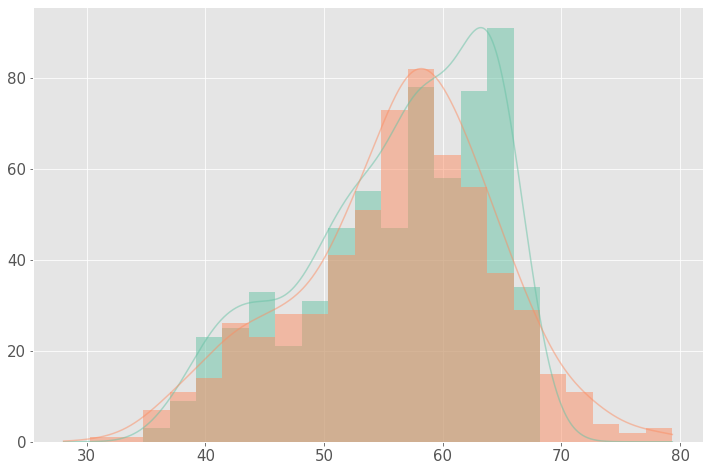

In [90]:
for metric in ['mean','glucose','weight','insulin','triglyceride']:
    plot(metric, distribution='kde')